In [247]:
import pathlib
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
GLOBAL_PATH = dirname(pathlib.Path().parent.resolve())

In [11]:
PATH_TO_REQUIREMENTS

'C:\\Users\\Miguel Pedro\\Documents\\GitHub\\nba_perf_predictor_tfm\\requirements\\requirements.txt'

In [16]:
# Load files
DATA_FOLDER = 'data'
COLLEGE_FOLDER = 'college_players_raw_data'
NBA_FOLDER = 'nba_players_raw_data'
NBA_FILE = 'nba_players_data_raw_1987_2022.xlsx'
COLLEGE_FILE = 'college_players_data_raw_1987_2022.xlsx'

path_to_college_excel = os.path.join(GLOBAL_PATH, DATA_FOLDER, COLLEGE_FOLDER, COLLEGE_FILE)
path_to_nba_excel = os.path.join(GLOBAL_PATH, DATA_FOLDER, NBA_FOLDER, NBA_FILE)

# Sheets names
per_game = 'PER_GAME_DATA'
total = 'SEASON_TOTAL_DATA'
per_40_m = 'PER_40_MIN_DATA'
per_100_p = 'PER_100_POSS_DATA'
advanced = 'SEASON_ADVANCED_DATA'

# Load College_data
college_per_game_df = pd.read_excel(path_to_college_excel, sheet_name= per_game)
college_total_df = pd.read_excel(path_to_college_excel, sheet_name= total)
college_per_40m_df = pd.read_excel(path_to_college_excel, sheet_name= per_40_m)
college_per_100p_df = pd.read_excel(path_to_college_excel, sheet_name= per_100_p)
college_advanced_df = pd.read_excel(path_to_college_excel, sheet_name= advanced)

In [17]:
# Load advanced nba data
nba_advanced_df = pd.read_excel(path_to_nba_excel, sheet_name= advanced)

In [19]:
nba_advanced_df.columns

Index(['id', 'name', 'heigth_cm', 'heigth_feet', 'draft', 'draft_team',
       'draft_overall', 'draft_year', 'season', 'age', 'team', 'league',
       'position', 'games', 'mp', 'per', 'ts%', '3par', 'ftr', 'orb%', 'drb%',
       'trb%', 'ast%', 'stl%', 'blk%', 'tov%', 'usg%', 'unknown', 'ows', 'dws',
       'ws', 'ws/48', 'unknown.1', 'obpm', 'dbpm', 'bpm', 'vorp'],
      dtype='object')

In [29]:
contract_length = 4

nba_rookie_ad_df = nba_early_results_filer(nba_advanced_df, contract_length)


In [31]:
nba_rookie_ad_df.columns

Index(['id', 'name', 'heigth_cm', 'heigth_feet', 'draft', 'draft_team',
       'draft_overall', 'draft_year', 'season', 'age', 'team', 'league',
       'position', 'games', 'mp', 'per', 'ts%', '3par', 'ftr', 'orb%', 'drb%',
       'trb%', 'ast%', 'stl%', 'blk%', 'tov%', 'usg%', 'unknown', 'ows', 'dws',
       'ws', 'ws/48', 'unknown.1', 'obpm', 'dbpm', 'bpm', 'vorp'],
      dtype='object')

In [32]:
predictive_list = ['ows', 'dws', 'ws', 'ws/48', 'obpm', 'dbpm', 'bpm', 'vorp']

In [34]:
# Merge predictive variable with college data
nba_rookie_ad_df[nba_rookie_ad_df['name'] == 'Zion Williamson']


,id,name,heigth_cm,heigth_feet,draft,draft_team,draft_overall,draft_year,season,age,...,unknown,ows,dws,ws,ws/48,unknown.1,obpm,dbpm,bpm,vorp
6525,2816,Zion Williamson,198,6-6,1,NewOrleansPelicans,1,2019,2020,19,...,NaN,1.5,0.4,2.0,0.141,NaN,3.5,-1.4,2.1,0.7
6526,2816,Zion Williamson,198,6-6,1,NewOrleansPelicans,1,2019,2021,20,...,NaN,7.1,1.6,8.7,0.205,NaN,6.1,-0.3,5.8,4.0


In [39]:
college_advanced_df[college_advanced_df['name'] == 'Ray Allen']

,id,name,position,heigth_cm,heigth_feet,draft,draft_team,draft_overall,draft_year,season,...,usg%,unknown,ows,dws,ws,ws/40,unknown.1,obpm,dbpm,bpm
27742,11627,Ray Allen,Guard,196,6-5,1,Minnesota Timberwolves,5,1996,1994,...,NaN,NaN,NaN,NaN,NaN,NaN,-,-,-,-
27743,11627,Ray Allen,Guard,196,6-5,1,Minnesota Timberwolves,5,1996,1995,...,NaN,NaN,NaN,NaN,NaN,NaN,-,-,-,-
27744,11627,Ray Allen,Guard,196,6-5,1,Minnesota Timberwolves,5,1996,1996,...,NaN,NaN,5.0,3.3,8.3,.274,-,-,-,-


In [46]:
college_advanced_df.groupby('id').count()

,name,position,heigth_cm,heigth_feet,draft,draft_team,draft_overall,draft_year,season,school,...,usg%,unknown,ows,dws,ws,ws/40,unknown.1,obpm,dbpm,bpm
id,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
1,3,3,3,3,3,3,3,3,3,3,...,0,3,3,3,3,3,3,3,3,3
2,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
3,3,3,3,3,3,3,3,3,3,3,...,0,3,3,3,3,3,3,3,3,3
4,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52691,2,2,2,2,2,2,2,2,2,2,...,2,0,2,2,2,2,0,2,2,2
52692,2,2,2,2,2,2,2,2,2,2,...,2,0,2,2,2,2,0,2,2,2
52693,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,0,1,1,1


In [40]:
testing_df = college_advanced_df[college_advanced_df['name'] == 'Ray Allen'].copy()

In [53]:
testing_df.groupby('id')['season'].count().rename_axis(["n_season_college"])
testing_df.groupby('id')['ws'].std()

Int64Index([11627], dtype='int64', name='n_season_college')

In [119]:
a = testing_df.groupby(['school', 'season'], as_index=False)['efg%'].sum()
b = testing_df.groupby(['school', 'season'], as_index=False).last('season')

c = a.merge(b, on = ['school', 'season'], how = 'left')
print(len(c.columns))
print(len(b.columns))

c.columns

23
22


Index(['school', 'season', 'efg%_x', 'id', 'draft', 'draft_overall',
       'draft_year', 'games', 'games_started', 'per', 'ts%', 'efg%_y', '3par',
       'ftr', 'pprod', 'orb%', 'drb%', 'trb%', 'ast%', 'stl%', 'blk%', 'tov%',
       'usg%'],
      dtype='object')

In [181]:
filter_collge_df = college_filterer(college_advanced_df, 1996)

Index(['id', 'name', 'school', 'draft', 'draft_overall', 'draft_year',
       'season', 'games', 'games_started', 'per', 'ts%', 'efg%', '3par', 'ftr',
       'pprod', 'orb%', 'drb%', 'trb%', 'ast%', 'stl%', 'blk%', 'tov%', 'usg%',
       'ws', 'n_seasons'],
      dtype='object')


In [184]:
filter_collge_df[filter_collge_df['name'] == 'Kyle Korver']


,id,name,school,draft,draft_overall,draft_year,season,games,games_started,per,...,trb%,ast%,stl%,blk%,tov%,usg%,ws,n_seasons,efg%_dev,ws_proportion
12555,20373,Kyle Korver,Creighton,1,51,2003,2003,34.0,34.0,1082.0,...,12.1,17.7,NaN,1.5,13.2,23.8,7.8,3,0.0,0.256579


In [210]:
def nba_early_results_filer(path_to_nba_excel, contract_rookie_length, first_year_limit, nba_success_var):

    # Load df
    nba_df = pd.read_excel(path_to_college_excel, sheet_name= advanced)

    nba_df_rookie = nba_df[((nba_df['season'] - nba_df['draft_year']) < contract_rookie_length + 1) &
                            (nba_df['draft_year'] > first_year_limit) & 
                            (nba_df['draft'] == 1)].reset_index(drop = True).copy()

    nba_df_rookie = nba_df_rookie.groupby(['id', 'draft_overall', 'draft_year', 'name'], as_index=False)[nba_success_var].sum()
    nba_df_rookie.columns = ['id', 'draft_overall', 'draft_year', 'name', '{success_var}_sum'.format(success_var = nba_success_var)]

    return nba_df_rookie

In [ ]:
def college_filterer(college_df, filtering_year):

    # Get only data from filtering_year onwards
    college_df['ws'] = college_df['ws'].replace('-', '0')
    college_df['ws'] = college_df['ws'].astype(float)
    college_df = college_df[college_df['season'] >= filtering_year].copy()

    # Get only the last record
    college_df_last = college_df.groupby(['id','name', 'school'], as_index=False).last('season')

    # Get interesting college length through years
    n_season = college_df.groupby(['id'], as_index=False)['season'].count()
    n_season.columns = ['id', 'n_seasons']

    college_df_last = college_df_last.merge(n_season, on=['id'],
                                                    how='left')

    print(college_df_last.columns)

    efg_last_season = college_df.groupby(['id','name', 'school'], as_index=False).last('season')[['id', 'efg%']]
    efg_first_season = college_df.groupby(['id','name', 'school'], as_index=False).last('season')[['id', 'efg%']]


    efg_improvement_df  = efg_last_season.merge(efg_first_season, on=['id'],
                                                    how='left')

    efg_improvement_df['efg%_dev'] = efg_improvement_df['efg%_x'] - efg_improvement_df['efg%_y']

    college_df_last = college_df_last.merge(efg_improvement_df[['id', 'efg%_dev']], on=['id'],
                                                    how='left')

    # Get relative WS respect to team
    school_df = college_df.groupby(['school', 'season'], as_index=False)['ws'].sum()


    left_df_college = college_df_last.merge(school_df, on=['school', 'season'],
                                                    how='left', suffixes=('_left', '_right'))

    college_df_last['ws_proportion'] = left_df_college['ws_left'] / left_df_college['ws_right']

    return college_df_last

In [ ]:
def college_df_loader(path_to_college_excel, data_type, study_start_year, specific_vars):

    # Load df
    college_df = pd.read_excel(path_to_college_excel, sheet_name= data_type)

    # Get only data greater than year of study
    college_df = college_df[college_df['season'] >= study_start_year]

    # Get only the year previous to nba
    college_df_last = college_df.groupby(['id','name', 'school'], as_index=False).last('season')

    college_df_last = college_specific_data_columns(college_df_last, college_df, data_columns)

    return college_df_last

    
    
    

In [ ]:
def college_specific_data_columns(college_last_df, college_df, columns_spec):

    for column in columns_spec:

        if 'n_seasons' in column:

            n_season = college_df.groupby(['id'], as_index=False)['season'].count()
            n_season.columns = ['id', 'n_seasons']

            college_last_df = college_last_df.merge(n_season, on=['id'],
                                                            how='left')  

        if '(dev)' in column:

            spec_column = column.split(' (dev)'[0])

            spec_last_season = college_df.groupby(['id','name', 'school'], as_index=False).last('season')[['id', spec_column]]
            spec_first_season = college_df.groupby(['id','name', 'school'], as_index=False).last('season')[['id', spec_column]]


            spec_improvement_df  = spec_last_season.merge(spec_first_season, on=['id'],
                                                            how='left')

            spec_improvement_df['{spec} (dev)'.format(spec = spec_column)] = spec_improvement_df['{spec}_x'.format(spec = spec_column)] - spec_improvement_df['{spec}_y'.format(spec = spec_column)]

            college_last_df = college_last_df.merge(spec_improvement_df[['id', '{spec} (dev)'.format(spec = spec_column)]], on=['id'],
                                                            how='left')

        if '(prop)' in column:

            spec_column = column.split(' (prop)'[0])

            school_df = college_df.groupby(['school', 'season'], as_index=False)[spec_column].sum()

            left_df_college = college_last_df.merge(school_df, on=['school', 'season'],
                                                            how='left', suffixes=('_left', '_right'))

            college_last_df['{spec} (prop)'.format(spec = spec_column)] = left_df_college['{spec}_left'.format(spec = spec_column)] / left_df_college['{spec}_right'.format(spec = spec_column)]

    return college_last_df



In [ ]:
def college_filter_dataframe(path_to_college_excel, df_to_load_list, study_start_year):

    college_dataframe_list = []

    unchanged_column_names = ['id', 'name', 'season', 'school', 'draft_overall', 'draft_year', 'draft']

    if per_game in df_to_load_list:

        college_per_game_df = college_df_loader(path_to_college_excel, per_game, study_start_year, per_game_vars)

        college_per_game_df.columns = ['{column} {type}'.format(column = column, type = per_game) if column not in unchanged_column_names else column for column in college_per_game_df]

        college_dataframe_list.append(college_per_game_df)

    if totals in df_to_load_list:

        college_totals_df = college_df_loader(path_to_college_excel, totals, study_start_year, totals_vars)

        college_totals_df.columns = ['{column} {type}'.format(column = column, type = totals) if column not in unchanged_column_names else column for column in college_totals_df]

        college_dataframe_list.append(college_totals_df)

    if per_40_m in df_to_load_list:

        college_per_40_m_df = college_df_loader(path_to_college_excel, per_40_m, study_start_year, per_40_m_vars)

        college_per_40_m_df.columns = ['{column} {type}'.format(column = column, type = per_40_m) if column not in unchanged_column_names else column for column in college_per_40_m_df]

        college_dataframe_list.append(college_per_40_m_df)

    if per_100_p in df_to_load_list:

        college_per_100_p_df = college_df_loader(path_to_college_excel, per_100_p, study_start_year, per_100_p_vars)

        college_per_100_p_df.columns = ['{column} {type}'.format(column = column, type = per_100_p ) if column not in unchanged_column_names else column for column in college_per_100_p_df]

        college_dataframe_list.append(college_per_100_p_df)


    if advanced in df_to_load_list:

        college_advanced_df = college_df_loader(path_to_college_excel, advanced, study_start_year, advanced_vars)

        college_advanced_df.columns = ['{column} {type}'.format(column = column, type = advanced ) if column not in unchanged_column_names else column for column in college_advanced_df]

        college_dataframe_list.append(college_advanced_df)

    # Merge all colleges dataframes
    college_global_df = pd.DataFrame()
    for index, dataframe in enumerate(college_dataframe_list):

        if index == 0:
            college_global_df = dataframe
        else:
            college_global_df = college_global_df.merge(dataframe, on = unchanged_column_names, how = 'left')

    return college_global_df

    

In [233]:
def merge_predictor_college(path_to_college_excel, path_to_nba_excel, nba_success_var, rookie_contract_length, study_start_year):

    # Get nba dataframe filtered
    nba_drafted_df = nba_early_results_filer(path_to_nba_excel, rookie_contract_length, study_start_year, nba_success_var)

    # Get college dataframe filtered
    df_to_load_list = [per_game, advanced]
    college_filtered_df = college_filter_dataframe(path_to_college_excel, df_to_load_list, study_start_year)

    # Merge to college
    nba_college_merge_df = nba_drafted_df.merge(college_df.drop(columns=['name', 'id']), on = ['draft_overall', 'draft_year'], how = 'left')

    # Remove players who did not go to college such as Lebron or Tracy McGrady
    nba_college_merge_df = nba_college_merge_df[nba_college_merge_df['season'].notnull()].reset_index(drop = True).copy() 

    return nba_college_merge_df
    

In [234]:
merge_nba_college = merge_predictor_college(nba_advanced_df, filter_collge_df, 'ws')

In [236]:
merge_nba_college[merge_nba_college['name'] == 'Jayson Tatum']

,id,draft_overall,draft_year,name,ws_sum,school,draft,season,games,games_started,...,trb%,ast%,stl%,blk%,tov%,usg%,ws,n_seasons,efg%_dev,ws_proportion
964,2578,3,2017,Jayson Tatum,25.5,Duke,1.0,2017.0,29.0,27.0,...,12.6,12.4,2.3,3.2,15.0,26.2,4.1,1.0,0.0,0.140411


C:\Users\Miguel Pedro\AppData\Local\Temp\ipykernel_6072\659468200.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(merge_nba_college.corr(), dtype=np.bool))


Text(0.5, 1.0, 'Correlation Heatmap')

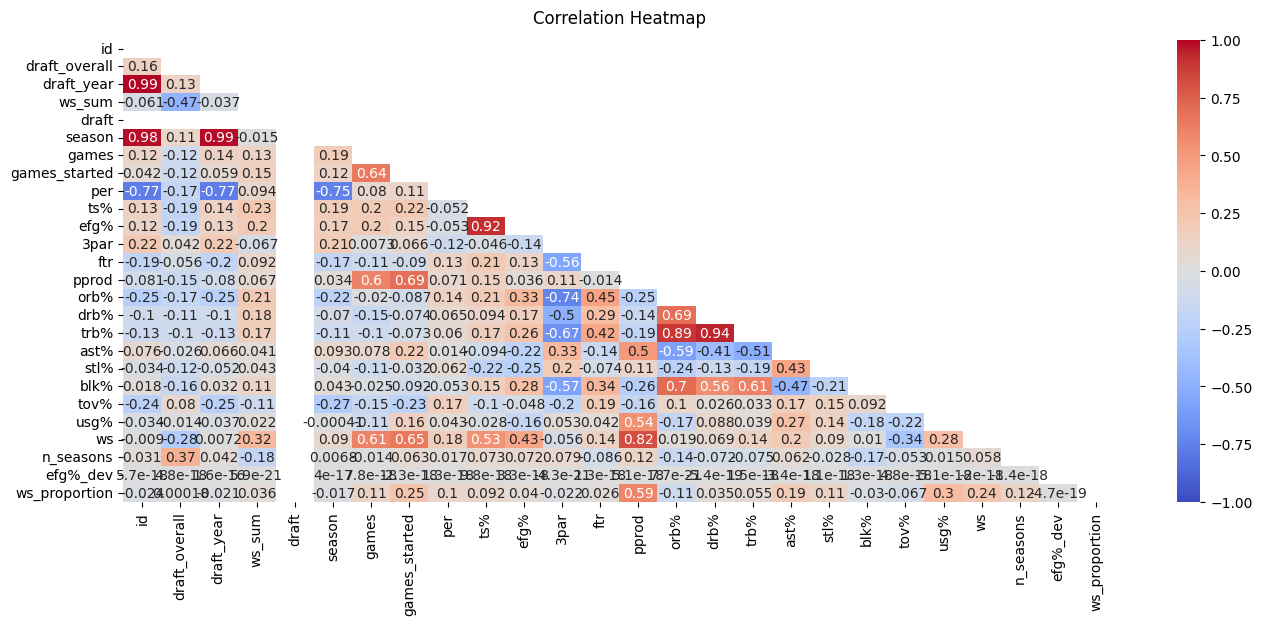

In [252]:
# PLOT TIIIIMEEEE
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(merge_nba_college.corr(), dtype=np.bool))
heatmap = sns.heatmap(merge_nba_college.corr(), mask = mask,  cmap = 'coolwarm', vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

Text(0.5, 1.0, 'Features Correlating with Sales Price')

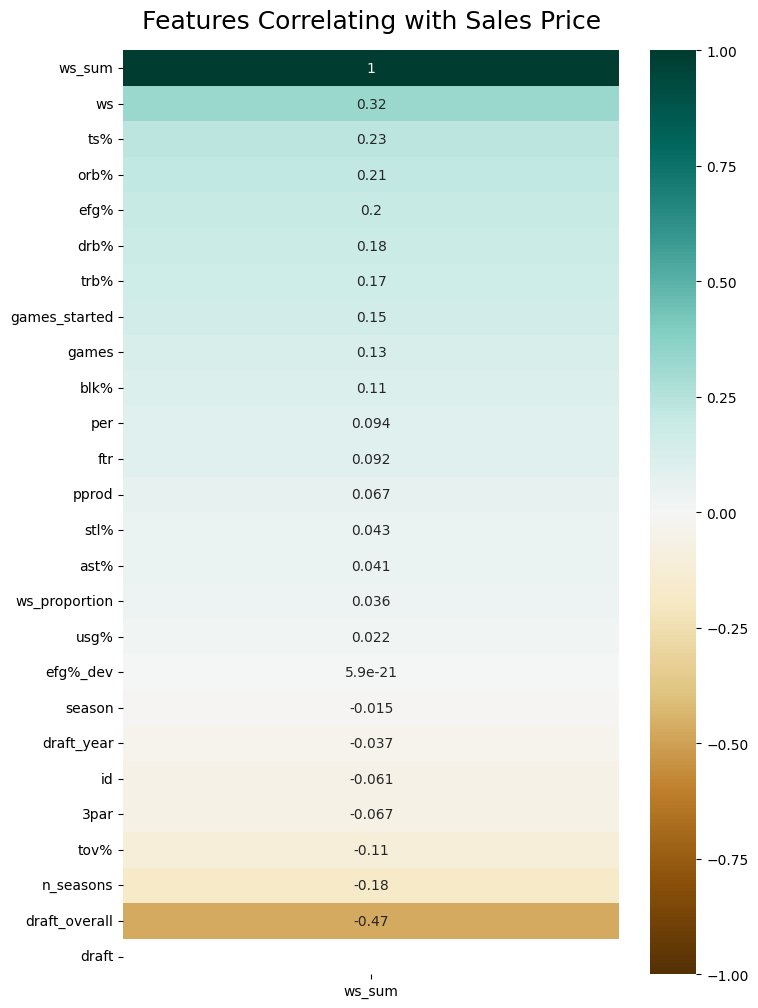

In [251]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(merge_nba_college.corr()[['ws_sum']].sort_values(by='ws_sum', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16)